Problema 6.13 p√°gina 58 del libro 'Aplicando Teor√≠a de Colas en Direcci√≥n de Operaciones':



La peluquer√≠a m@ripuri est√° dirigida y gestionada √∫nicamente por su 
propietaria.. Atiende seg√∫n el principio de que el primero que entra es el primero 
que sale. La peluquer√≠a, dado su car√°cter cibern√©tico est√° muy ocupada los 
s√°bados por la ma√±ana y la propietaria se plantea la posibilidad de contratar a una 
ayudante. As√≠ pues, hace un estudio y se da cuenta de que los clientes llegan con 
una distribuci√≥n de Poisson de media 5 clientes por hora. Debido a su excelente 
reputaci√≥n los clientes est√°n dispuestos a esperar lo que haga falta. La propietaria, 
se√±ora Purificaci√≥n, sigue con sus estudios y estima que el tiempo medio en el que 
atiende un cliente es de 10 minutos seg√∫n una distribuci√≥n exponencial. Decide 
primero calcular el n√∫mero medio de clientes en el sal√≥n y el n√∫mero de medio de 
clientes esperando un corte de pelo . S√≥lo tiene 4 sillas adem√°s del sill√≥n de 
peluquera, ¬øcu√°l es la probabilidad de que llegue un cliente y no encuentre sitio?, 
¬øcu√°l es la probabilidad de que alguien espere m√°s de 45 minutos?

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [81]:
# Configuraci√≥n inicial
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
np.random.seed(42)  # Reproducibilidad

In [82]:
#Simulaci√≥n Base
def run_simulation(simulation_hours=8760, num_chairs=5):
    # Generar eventos de llegada y servicio
    inter_arrivals = np.random.exponential(1/5, int(1.5 * 5 * simulation_hours))
    arrival_times = np.cumsum(inter_arrivals)
    arrival_times = arrival_times[arrival_times <= simulation_hours]
    service_times = np.random.exponential(1/6, len(arrival_times))
    
    # Simulaci√≥n FIFO
    queue = []
    waiting_times = []
    system_occupancy = []
    
    for i in range(len(arrival_times)):
        arrival = arrival_times[i]
        service_time = service_times[i]
        
        # Procesar salidas
        while queue and queue[0][0] <= arrival:
            departure, client_arrival = queue.pop(0)
            waiting_times.append(departure - client_arrival)
        
        # Gesti√≥n de sillas
        if len(queue) < num_chairs:
            if not queue:
                departure_time = arrival + service_time
            else:
                departure_time = queue[-1][0] + service_time
            queue.append((departure_time, arrival))
        
        system_occupancy.append(len(queue))
    
    return {
        'waiting_times': waiting_times,
        'system_occupancy': system_occupancy,
        'arrival_times': arrival_times
    }

In [83]:
#%% An√°lisis de Convergencia
def convergence_analysis():
    time_points = np.linspace(100, 8760, 50)
    avg_clients = []
    
    for t in time_points:
        results = run_simulation(t)
        avg_clients.append(np.mean(results['system_occupancy']))
    
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, avg_clients, 'b-', lw=2)
    plt.axhline(y=5, color='r', linestyle='--', label='Valor te√≥rico')
    plt.xlabel('Horas de Simulaci√≥n')
    plt.ylabel('Clientes Promedio')
    plt.title('Convergencia del Sistema')
    plt.legend()
    plt.savefig('images/convergencia.png', dpi=300)
    plt.show()

In [84]:
#%% Distribuci√≥n de Esperas
def plot_waiting_distribution():
    results = run_simulation(8760)
    waiting_hours = np.array(results['waiting_times'])
    
    plt.figure(figsize=(10, 6))
    sns.histplot(waiting_hours*60, kde=True, bins=50, 
                color='teal', stat='density')
    plt.xlabel('Minutos de Espera')
    plt.title('Distribuci√≥n de Tiempos de Espera')
    plt.savefig('images/distribucion_espera.png', dpi=300)
    plt.show()

In [85]:
#%% Intervalos de Confianza
def confidence_intervals(n_simulations=30):
    simulations = [run_simulation(2000) for _ in range(n_simulations)]
    avg_clients = [np.mean(s['system_occupancy']) for s in simulations]
    
    mean = np.mean(avg_clients)
    ci = stats.t.interval(0.95, len(avg_clients)-1, 
                         loc=mean, scale=stats.sem(avg_clients))
    
    plt.figure(figsize=(8, 6))
    plt.errorbar(0, mean, yerr= mean-ci[0], fmt='o', 
                capsize=10, markersize=8)
    plt.xlim(-0.5, 0.5)
    plt.xticks([])
    plt.ylabel('Clientes Promedio')
    plt.title('Intervalo de Confianza 95%')
    plt.savefig('images/intervalo_confianza.png', dpi=300)
    plt.show()

In [86]:
#%% Prueba de Hip√≥tesis
def hypothesis_test():
    import pandas as pd
    
    data = []
    for chairs in [5, 6]:
        for _ in range(20):
            sim_result = run_simulation(2000, chairs)
            data.extend([(x, f'{chairs} Sillas') for x in sim_result['system_occupancy']])
    
    df = pd.DataFrame(data, columns=['Clientes', 'Configuraci√≥n'])
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Configuraci√≥n', y='Clientes', data=df)
    plt.title('Impacto del N√∫mero de Sillas')
    plt.savefig('images/hipotesis.png', dpi=300, bbox_inches='tight')
    plt.show()

‚öôÔ∏è Ejecutando simulaci√≥n completa...
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
üìä RESULTADOS COMPLETOS DE LA SIMULACI√ìN
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

üîπ M√©tricas clave:
- Clientes promedio en sistema: 2.88
- Tiempo espera promedio: 26.2 minutos
- Prob. de no encontrar asiento: 9.93%
- Prob. de espera >45 min: 17.51%

üìà Estad√≠sticas de espera:
- M√°xima espera: 168.7 minutos
- M√≠nima espera: 0.0 minutos
- Percentil 95%: 66.7 min

üì¶ Ocupaci√≥n del sistema:
- M√°ximo clientes simult√°neos: 5
- % tiempo con todas las sillas ocupadas: 22.07%


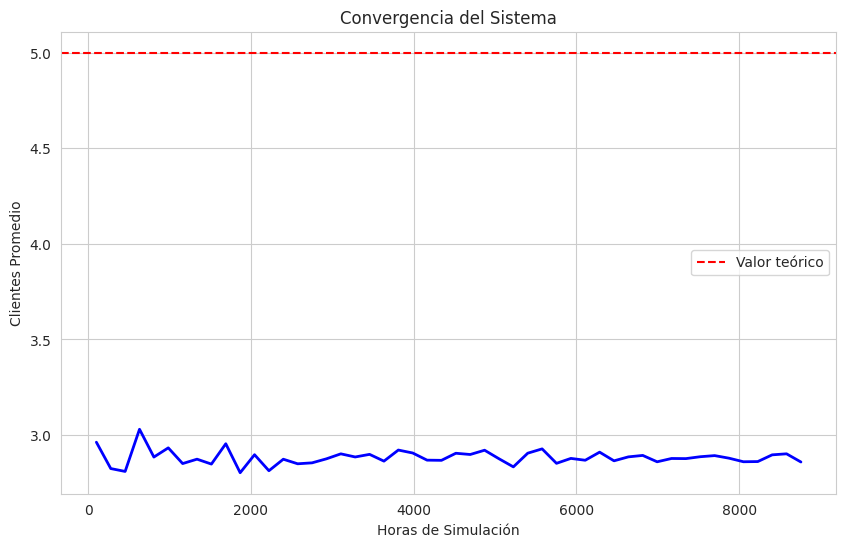

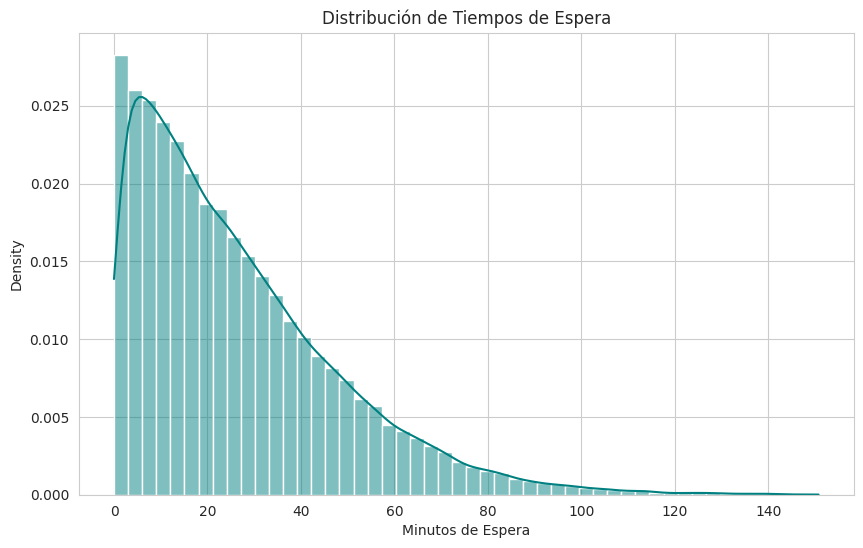

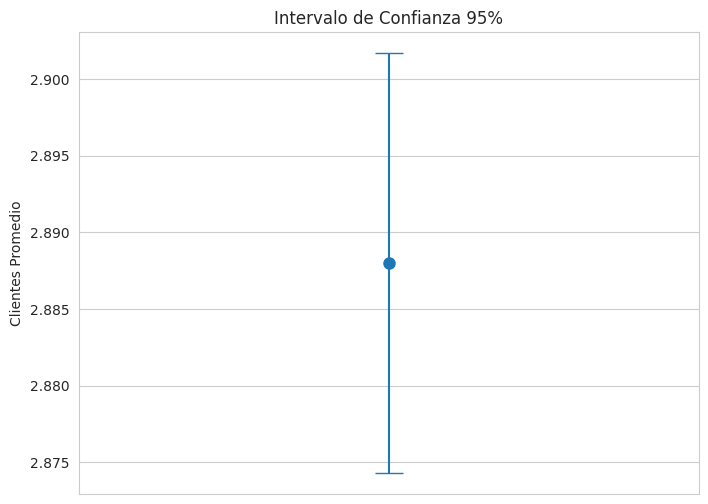

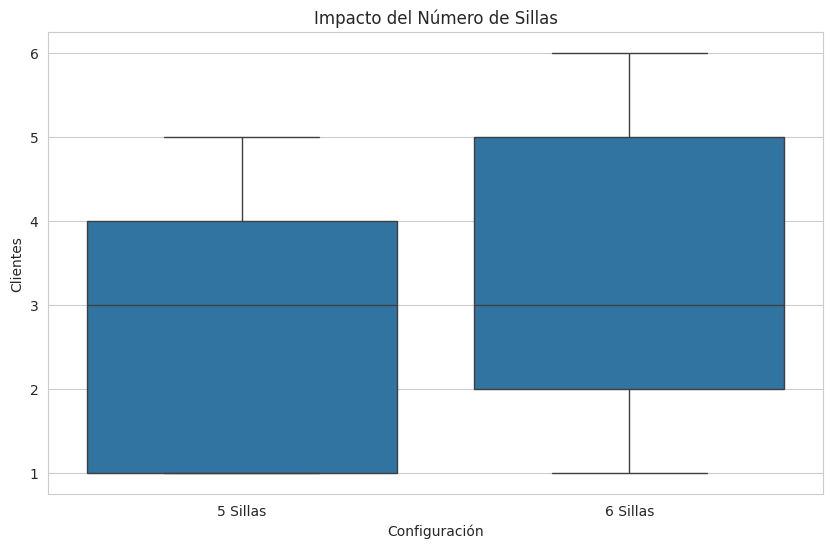


‚úÖ Todos los an√°lisis fueron guardados como im√°genes (.png)


In [87]:
def print_simulation_results(results):
    # M√©tricas b√°sicas
    avg_clients = np.mean(results['system_occupancy'])
    avg_wait = np.mean(results['waiting_times'])
    prob_no_seat = 1 - (len(results['waiting_times']) / len(results['arrival_times']))
    prob_long_wait = np.mean(np.array(results['waiting_times']) > 0.75)
    
    print("‚ïê"*50)
    print("üìä RESULTADOS COMPLETOS DE LA SIMULACI√ìN")
    print("‚ïê"*50)
    print(f"\nüîπ M√©tricas clave:")
    print(f"- Clientes promedio en sistema: {avg_clients:.2f}")
    print(f"- Tiempo espera promedio: {avg_wait*60:.1f} minutos")
    print(f"- Prob. de no encontrar asiento: {prob_no_seat:.2%}")
    print(f"- Prob. de espera >45 min: {prob_long_wait:.2%}")
    
    print(f"\nüìà Estad√≠sticas de espera:")
    print(f"- M√°xima espera: {np.max(results['waiting_times'])*60:.1f} minutos")
    print(f"- M√≠nima espera: {np.min(results['waiting_times'])*60:.1f} minutos")
    print(f"- Percentil 95%: {np.percentile(results['waiting_times'], 95)*60:.1f} min")
    
    print(f"\nüì¶ Ocupaci√≥n del sistema:")
    print(f"- M√°ximo clientes simult√°neos: {np.max(results['system_occupancy'])}")
    print(f"- % tiempo con todas las sillas ocupadas: {np.mean(np.array(results['system_occupancy']) >= 5):.2%}")

def run_full_analysis():
    print("‚öôÔ∏è Ejecutando simulaci√≥n completa...")
    results = run_simulation(8760)  # 1 a√±o de simulaci√≥n
    
    print_simulation_results(results)
    
    # Gr√°ficos adicionales
    convergence_analysis()
    plot_waiting_distribution()
    confidence_intervals()
    hypothesis_test()
    
    print("\n‚úÖ Todos los an√°lisis fueron guardados como im√°genes (.png)")

# Ejecutar todo
run_full_analysis()